# Python ML Example with Keras
(based on https://elitedatascience.com/keras-tutorial-deep-learning-in-python)

### Why Keras?

- Keras recommended library for deep learning in Python, especially for beginners. - Its minimalistic, modular approach makes it a breeze to get deep neural networks up and running.
- You can read more about it here:

https://elitedatascience.com/python-deep-learning-libraries#keras

### What is Deep Learning?

- **Deep learning** refers to neural networks with multiple hidden layers that can learn increasingly abstract representations of the input data.
    - This is obviously an oversimplification, but it’s a practical definition for us right now.

- For example, deep learning has led to major advances in computer vision.
- We’re now able to classify images, find objects in them, and even label them with captions.
- To do so, deep neural networks with many hidden layers can sequentially learn more complex features from the raw input image:
    - The first hidden layers might only learn local edge patterns.
    - Then, each subsequent layer (or filter) learns more complex representations.
    - Finally, the last layer can classify the image as a cat or kangaroo.
- These types of deep neural networks are called **Convolutional Neural Networks**.

![](Images/neuron.jpeg)

3 things are happening here. First, each input is multiplied by a weight:

$$
\begin{eqnarray}
x_1 &\to& x_1 \times w_1\\
x_2 &\to& x_2 \times w_2
\end{eqnarray}
$$

Next, all the weighted inputs are added together with a bias $b$.

Finally, the sum is passed through an activation function:

The activation function is used to turn an unbounded input into an output that has a nice, predictable form. A commonly used activation function is the sigmoid function:



![](Images/sigmoid.jpeg)

Estimating the $w_i$ is called **training**.

Usually one neuron in one layer is not enough for complex tasks.

![](Images/neural_net2.jpeg)

### What are Convolutional Neural Networks?

- Convolutional Neural Networks (CNN’s) are multi-layer neural networks (sometimes up to 17 or more layers) that assume the input data to be images.

![](Images/neural_net2.jpeg)

![](Images/cnn.jpeg)

![](Images/typical_cnn_architecture.png)

- By making this requirement, CNN’s can drastically reduce the number of parameters that need to be tuned.
- Therefore, CNN’s can efficiently handle the high dimensionality of raw images.

- Their underlying mechanics are beyond the scope of this tutorial.
  (https://cs231n.github.io/convolutional-networks/)

### What we can't offer in this tutorial...

- This is not a complete course on deep learning.
- Instead, this tutorial is meant to get you from zero to your first Convolutional Neural Network with as little headache as possible!
- It demonstrates the power of Python and serves as an use case example for Python.

# 8 Steps towards a first CNN

### Step 1: Import libraries

- Let’s start by importing matplotlib and numpy. 
- Then set a seed for the computer’s pseudorandom number generator. 

In [10]:
import matplotlib
import numpy as np
np.random.seed(123)

- Next, we’ll import the Sequential model type from Keras.
- This is simply a linear stack of neural network layers.
- It’s perfect for the type of feed-forward CNN we’re building in this tutorial.

In [11]:
from keras.models import Sequential

2023-07-18 23:09:41.564365: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Next, let’s import the “core” layers from Keras.
- These are the layers that are used in almost any neural network:

In [12]:
from keras.layers import Dense, Dropout, Activation, Flatten

- Then, we’ll import the CNN layers from Keras.
- These are the convolutional layers that will help us efficiently train on image data:

In [13]:
from keras.layers import Convolution2D, MaxPooling2D

- Finally, we’ll import some utilities. This will help us transform our data later:

In [14]:
from keras.utils import np_utils

### Step 2: Load image data from MNIST.

- MNIST is a great dataset for getting started with deep learning and computer vision.
- It’s a big enough challenge to warrant neural networks, but it’s manageable on a single computer.
- That makes it perfect for this Keras tutorial.

- The Keras library conveniently includes it already. We can load it like so:

In [15]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


- What shape does the dataset have?

In [16]:
print( X_train.shape )

(60000, 28, 28)


- 60000 entries 
- each one is a 28x28 pixel picture
- Let's have a look at a few:

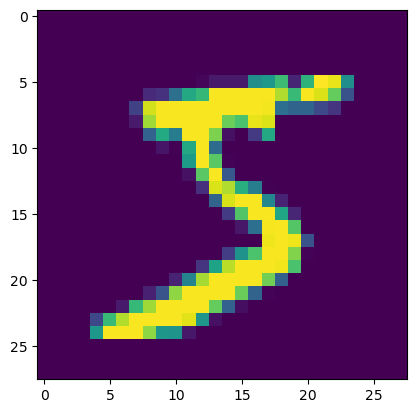

In [17]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

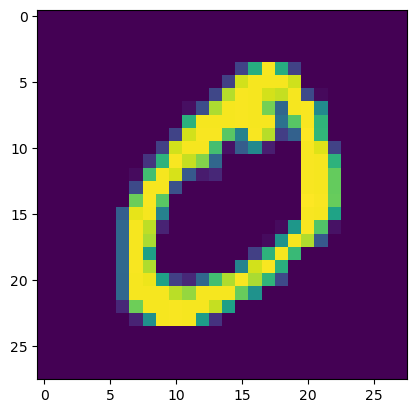

In [18]:
plt.imshow(X_train[1])

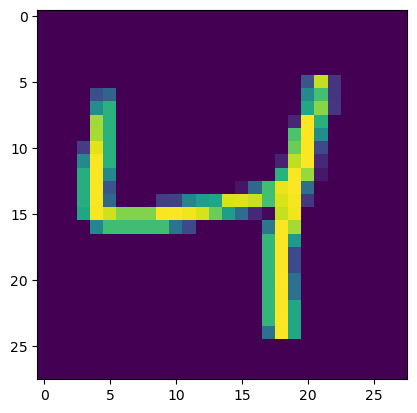

In [19]:
plt.imshow(X_train[2])

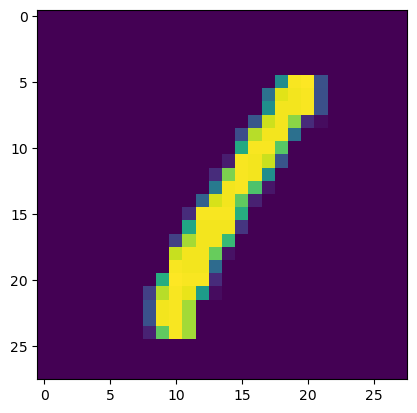

In [20]:
plt.imshow(X_train[3])

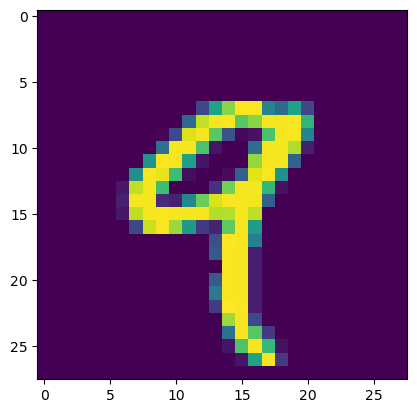

In [21]:
plt.imshow(X_train[4])

### Step 3: Preprocess input data for Keras.


- When using the TensorFlow backend, you must explicitly declare a dimension for the number of channels in the input images. 
    - For example, a full-color image with all 3 RGB channels will have a channel value of 3.

- Our MNIST images only have 1 channel, but we must explicitly declare that.

- **We want to transform our dataset from having shape (n, width, height) to (n, width, height, channels).**

In [22]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

- To confirm, we can print X_train’s dimensions again:

In [23]:
print( X_train.shape )
# (60000, 28, 28, 1)

(60000, 28, 28, 1)


- The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Now, our input data are ready for model training.

### Step 4: Preprocess class labels for Keras

- Class labels are basically the "true values".
- Let’s take a look at the shape of our class label data:

In [25]:
print( y_train.shape )
# (60000,)

(60000,)


In [26]:
y_train[0], y_train[1], y_train[2], y_train[3], y_train[4], 

(5, 0, 4, 1, 9)

- We should have 10 different classes, one for each digit. 
- But it looks like we only have a 1-dimensional array.

- This can be easily fixed:

In [27]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

- Now we can take another look:

In [28]:
print( Y_train.shape )
# (60000, 10)

(60000, 10)


- That looks much better.

### Step 5: Define model architecture

- Now we’re ready to define our model architecture. 
    - How many layers? What kind of layers? ...
- In actual R&D work, researchers will spend a considerable amount of time studying model architectures.

- We don't have the time to re-do the architecture analysis.
- We'll provide the actual architecture.

- Let’s start by declaring a sequential model format:

In [29]:
model = Sequential()

2023-07-18 23:10:30.963423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Next, we declare the input layer:

In [30]:
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))


- The input shape parameter should be the shape of 1 sample. 
- In this case, it’s the same (28, 28, 1) that corresponds to the (width, height, channels) of each digit image.

- But what do the first two parameters represent? 
- They correspond to the number of convolution filters to use (32) and the number of rows and columns (3, 3) in each convolution kernel.

    - Note: The step size is (1,1) by default, and it can be tuned using the ‘strides‘ parameter.

- We can confirm this by printing the shape of the current model output:

In [31]:
print( model.output_shape )
# (None, 26, 26, 32)

(None, 26, 26, 32)


- That output corresponds to (samples, new_rows, new_cols, filters). 
- In other words, the current model will output all of the samples, convoluted into a 26×26 array using 32 filters.
---
- Next, we can simply add more layers to our model like we’re building legos:

In [32]:
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

- Again, we won’t go into the theory too much, but it’s important to highlight the Dropout layer we just added: 
    - This is a method for regularizing our model in order to prevent **overfitting**.

![](Images/overfitting.jpeg)

- '''MaxPooling2D''' is a way to reduce the number of parameters in our model by sliding a 2×2 pooling filter across the previous layer and taking the max of the 4 values in the 2×2 filter.

- So far, for model parameters, we’ve added two Convolution layers. 
- To complete our model architecture, let’s add a **fully connected** layer and then the output layer:

In [33]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

- For **Dense layers**, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

- Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

- Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

---

- Now all we need to do is define the loss function and the optimizer, and then we’ll be ready to train it.

### Step 6: Compile model

- Almost done!
- We just need to compile the model and we’ll be ready to train it. 
- When we **compile** the model, we declare the loss function and the optimizer (SGD, Adam, etc.).
- N.B. Keras has a variety of loss functions and out-of-the-box optimizers to choose from.

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Step 7: Fit model on training data.

- To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [36]:
train = model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0727 - accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0600 - accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0516 - accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0438 - accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0395 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0290 - accuracy: 0.9907
Epoch 10/10
1875/1875 [==============================] - 9

### Step 8: Evaluate model on test data.


- Finally, we can evaluate our model on the test data:


In [37]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [38]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.02750169113278389
Test accuracy: 0.992900013923645


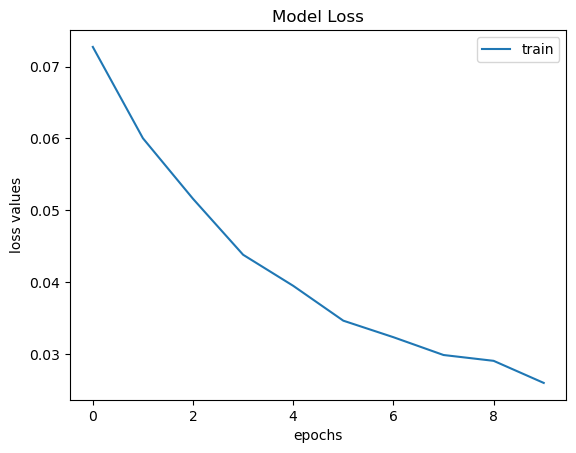

In [43]:
plt.plot(train.history['loss'], label='train')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

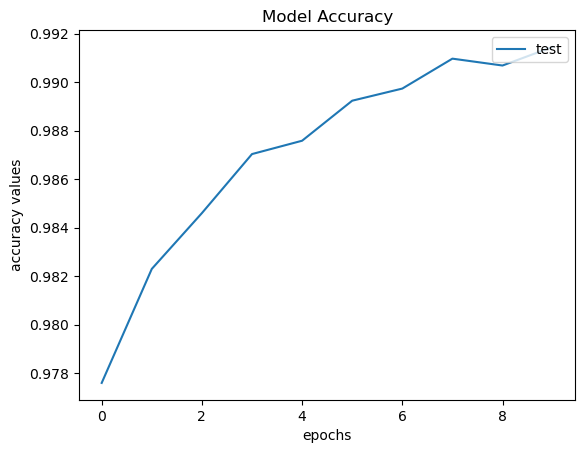

In [42]:
plt.plot(train.history['accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy values')
plt.legend(loc='upper right')
plt.show()